Recurrent Neural Networks (RNNs) are a class of neural networks particularly suited for sequence data like time series, text, and speech, where the output at any time step depends on previous inputs. Unlike traditional feedforward neural networks, RNNs have loops that allow them to pass information from one step of the sequence to the next.
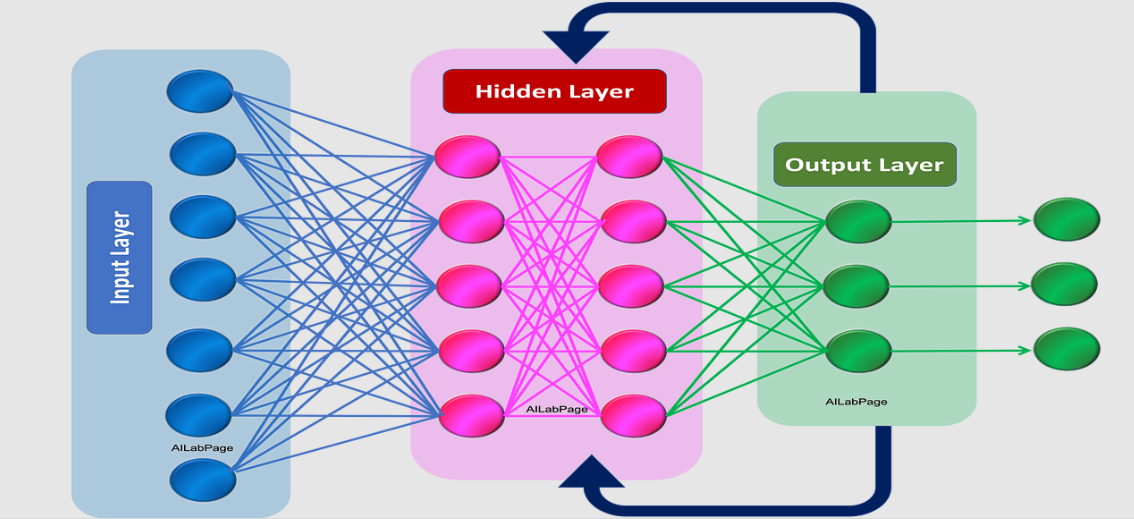



Let's go through the mathematical explanation of backpropagation for RNNs and then implement a simple RNN in Python.
### Mathematical Explanation of Backpropagation Through Time (BPTT) in RNNs
RNNs share parameters across time steps, and backpropagation through time (BPTT) involves calculating gradients over multiple time steps.

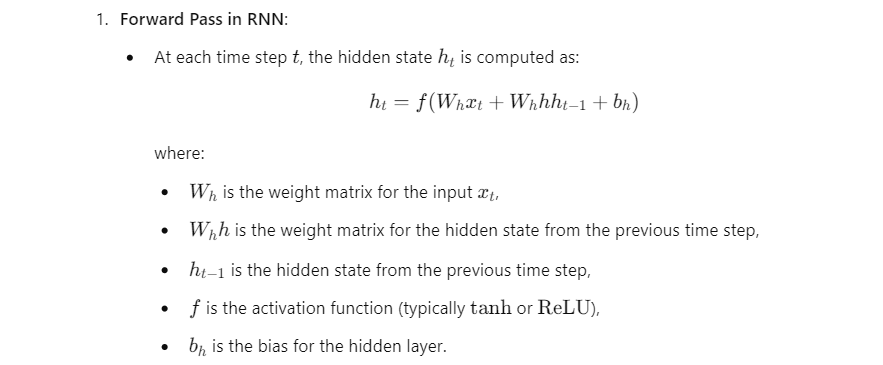

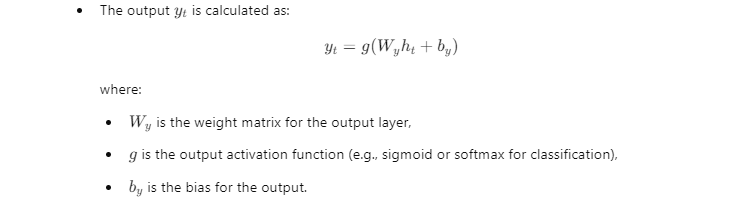

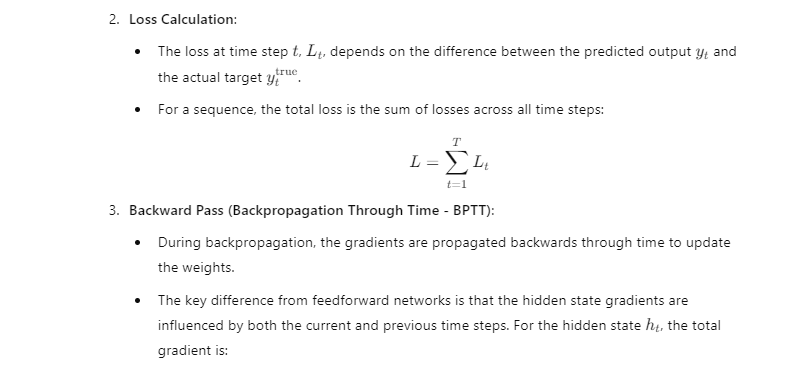

### Learning Rates Values
- Small 0.001-0.01 (Stable,slow convergence)
- Medium 0.01-.1 (Balance between the stability and theconvergence
- Large 0.1-1 (fast convergence , risk of divergence)

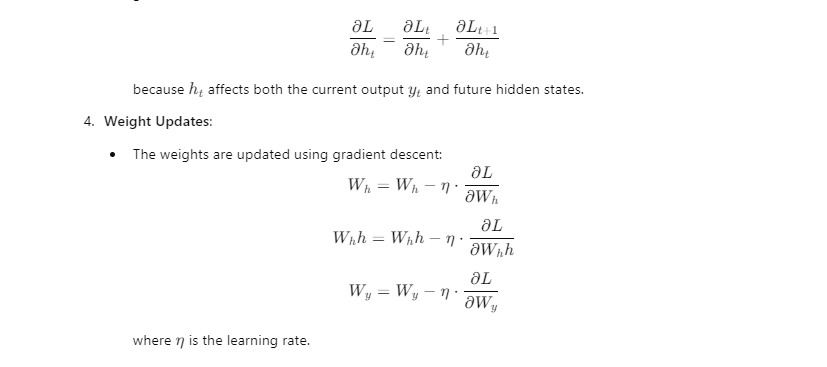

### Example: Implementing a Simple RNN for Sequence Prediction
Let's implement a simple RNN in Python using NumPy to predict a sequence. We'll use a toy dataset where the RNN tries to predict the next number in a sequence.


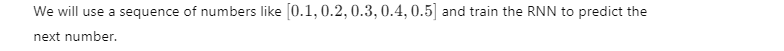

In [8]:
import numpy as np

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# RNN Model
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Weights initialization
        self.W_xh = np.random.randn(input_size, hidden_size)  # Input to hidden
        self.W_hh = np.random.randn(hidden_size, hidden_size) # Hidden to hidden (recurrent)
        self.W_hy = np.random.randn(hidden_size, output_size) # Hidden to output
        
        # Biases
        self.b_h = np.zeros((1, hidden_size))
        self.b_y = np.zeros((1, output_size))
        
        # Hidden state
        self.h = np.zeros((1, hidden_size))

    def forward(self, x):
        # Forward pass
        self.h = sigmoid(np.dot(x, self.W_xh) + np.dot(self.h, self.W_hh) + self.b_h)
        y = sigmoid(np.dot(self.h, self.W_hy) + self.b_y)
        return y

    def backward(self, x, y_true, y_pred, learning_rate=0.01):
        # Output layer gradient
        output_error = y_pred - y_true
        dW_hy = np.dot(self.h.T, output_error)
        db_y = np.sum(output_error, axis=0, keepdims=True)

        # Hidden layer gradients (BPTT)
        hidden_error = np.dot(output_error, self.W_hy.T) * sigmoid_derivative(self.h)
        dW_xh = np.dot(x.T, hidden_error)
        dW_hh = np.dot(self.h.T, hidden_error)
        db_h = np.sum(hidden_error, axis=0)

        # Update weights and biases
        self.W_hy -= learning_rate * dW_hy
        self.W_xh -= learning_rate * dW_xh
        self.W_hh -= learning_rate * dW_hh
        self.b_y -= learning_rate * db_y
        self.b_h -= learning_rate * db_h

# Dataset (sequence)
sequence = np.array([[0.1], [0.2], [0.3], [0.4], [0.5]])

# Labels (next number in the sequence)
targets = np.array([[0.2], [0.3], [0.4], [0.5], [0.6]])

# RNN model
rnn = SimpleRNN(input_size=1, hidden_size=5, output_size=1)

# Training
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    total_loss = 0
    for i in range(len(sequence)):
        # Forward pass
        x = sequence[i].reshape(1, -1)
        y_true = targets[i].reshape(1, -1)
        y_pred = rnn.forward(x)
        
        # Loss calculation (mean squared error)
        loss = 0.5 * np.sum((y_pred - y_true) ** 2)
        total_loss += loss
        
        # Backward pass
        rnn.backward(x, y_true, y_pred, learning_rate)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss}')




Epoch 0, Loss: 0.06578958325021902
Epoch 100, Loss: 0.039763492157016016
Epoch 200, Loss: 0.0328759704421855
Epoch 300, Loss: 0.025015625605827957
Epoch 400, Loss: 0.017329443070606205
Epoch 500, Loss: 0.011306523045043693
Epoch 600, Loss: 0.007675617272095215
Epoch 700, Loss: 0.005997885534720754
Epoch 800, Loss: 0.005351304294631017
Epoch 900, Loss: 0.005035325757668581


In [9]:
# Testing the model
test_sequence = np.array([[0.6]])
predicted_value = rnn.forward(test_sequence)
print(f"Predicted next value: {predicted_value}")

Predicted next value: [[0.69239411]]


### Selecting appropriate batch size and number of epochs in training a Recurrent Neural Network (RNN) is critical for achieving good model performance, but there is no one-size-fits-all answer. It depends on factors such as your dataset size, model complexity, computational resources, and training objectives. Let’s break down the process for selecting these parameters.

### 1. Batch Size:
The batch size is the number of samples processed before the model's internal parameters (weights and biases) are updated.

### Trade-offs of Different Batch Sizes:
## 1.Small Batch Size (e.g., 16, 32, 64):

**Advantages**
- Provides more frequent weight updates, which can help the model converge faster in early epochs.
- Introduces more stochasticity (randomness), which may help avoid local minima in the loss landscape.
- Requires less memory (RAM/VRAM), so you can train on larger models or datasets with limited hardware.

### Disadvantages:
- Noisy gradient updates can cause the model to "jump" around the optimal solution, potentially leading to slower convergence in the long run.
- Can lead to a less accurate estimate of the gradient, causing the learning process to be unstable.
## 2. Large Batch Size (e.g., 128, 256, 512 or more):

**Advantages**
- More stable gradient updates due to the averaging effect of more samples in each batch.
- Allows for efficient use of hardware, especially on modern GPUs.
- Can lead to faster convergence in terms of wall-clock time per epoch.

**Disadvantages**
- Requires more memory, which may be a problem if you have limited hardware.
- May lead to less stochasticity, which might make it harder to escape saddle points or local minima.
***General Guidelines***
- Small datasets: Use smaller batch sizes (16, 32) to provide more frequent updates and help prevent overfitting.
- Large datasets: Larger batch sizes (128, 256, or higher) can be used for faster computation and more stable gradient estimates.
- Computational constraints: Choose a batch size that fits within your memory limits (GPU/CPU).
- General rule of thumb: Start with a batch size of 32 or 64 and adjust based on your dataset size, model convergence, and available memory.
### 2. Number of Epochs:
An epoch is one complete pass through the entire training dataset. The number of epochs determines how long the model trains and is often tuned by monitoring the model’s performance on a validation set.

**Considerations for Choosing Epochs**
- Underfitting: If the model does not have enough epochs, it may underfit the data, meaning it hasn't learned well enough from the training data.
- Overfitting: Too many epochs can lead to overfitting, where the model memorizes the training data but generalizes poorly to unseen data (validation/test set).

**How to Choose the Right Number of Epochs**
- Validation Performance: Typically, you’ll monitor the performance on a validation set during training and stop training once the validation performance stops improving. This can be done with techniques like early stopping.
- Start with a High Number: Begin with a higher number of epochs (e.g., 100, 200) and use early stopping to avoid running too many.
- Learning Rate: Lower learning rates often require more epochs since the updates are smaller, while higher learning rates might converge faster but risk skipping over minima.
### 3. Practical Steps to Choose Batch Size and Epochs:
**Step 1: Choose an Initial Batch Size**
- Start with a batch size of 32 or 64 (smaller datasets).
- For large datasets, 128 or 256 can be a reasonable starting point.
- If you encounter memory issues, reduce the batch size until it fits into the available GPU/CPU memory.
**Step 2: Choose Initial Epochs**
- Start with a relatively high number, say 50 to 100 epochs.
- Monitor the validation loss and use early stopping. This technique stops training if the model performance on the validation - set stops improving (e.g., after a patience of 5 epochs).
**Step 3: Experiment and Tune**
- Experiment with batch sizes: Once you establish an initial baseline model, try different batch sizes (e.g., 32, 64, 128) and - check the impact on training speed, validation loss, and final model performance.
- Adjust epochs based on results: If the model stops improving after a certain number of epochs, use that as a rough guide for future experiments.

***4. Using Cross-Validation***
If you have a small dataset, use cross-validation (e.g., k-fold cross-validation) to better evaluate the model's performance with different batch sizes and epochs.

### Example: Tuning Batch Size and Epochs in an RNN
***Let’s assume you are training an RNN on a time-series dataset***

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Create a toy dataset
X_train = np.random.rand(1000, 10, 1)  # 1000 samples, 10 time steps, 1 feature
y_train = np.random.rand(1000, 1)   

In [14]:
# RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(10, 1)))  # 50 hidden units
model.add(Dense(1))  # Single output node
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/100
25/25 - 1s - loss: 0.1297 - val_loss: 0.0949 - 1s/epoch - 45ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0942 - val_loss: 0.0903 - 74ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0883 - val_loss: 0.0905 - 81ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0872 - val_loss: 0.0896 - 85ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0890 - val_loss: 0.0926 - 73ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0894 - val_loss: 0.0926 - 75ms/epoch - 3ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0887 - val_loss: 0.0921 - 99ms/epoch - 4ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0884 - val_loss: 0.0915 - 92ms/epoch - 4ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0871 - val_loss: 0.0906 - 96ms/epoch - 4ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0870 - val_loss: 0.0986 - 85ms/epoch - 3ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0889 - val_loss: 0.0912 - 82ms/epoch - 3ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0872 - val_loss: 0.0915 - 65ms/epoch - 3ms/step
Epoch 13/100
25/25 - 0s - 

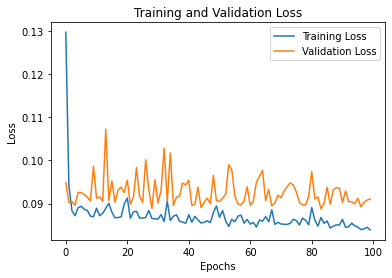

In [15]:
# Start with a batch size of 32 and 100 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)



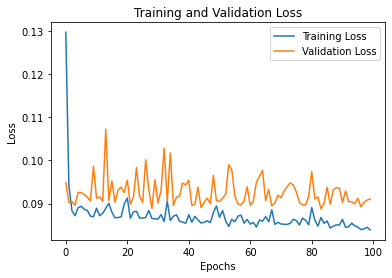

In [16]:
# Plot training and validation loss to monitor performance
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


***Key Takeaways from the Example***
- Monitor the training and validation loss: As shown in the plot, if the validation loss stops improving while the training loss continues to decrease, it indicates overfitting. You can adjust the number of epochs or batch size accordingly.
- Try different batch sizes: After running this model, you can try batch sizes of 16, 64, 128, and observe how they impact training speed and model performance.
- Use early stopping: In practical scenarios, implement early stopping to avoid overtraining.
**Summary**
- Batch size: Start with 32 or 64 and adjust based on the dataset size, computational resources, and model performance.
- Number of epochs: Start with a larger number (e.g., 100) and use early stopping to avoid overfitting.
***General rule: Experiment, monitor validation loss, and use early stopping for tuning these parameters optimally**